<a href="https://colab.research.google.com/github/AlexHudnev/mla/blob/main/MLA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

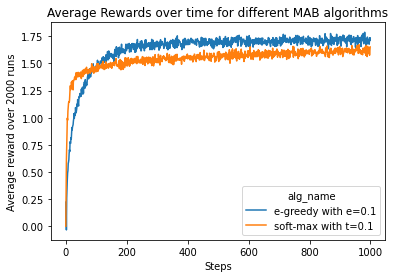

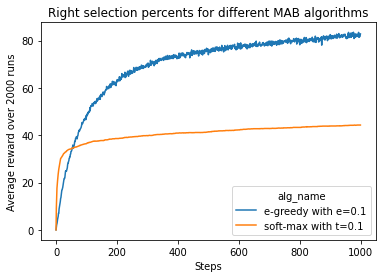

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
 
class ExperimentRunner:
    def __init__(self):
        self.all_results_part1 = pd.DataFrame()
        self.all_results_part2 = pd.DataFrame()
 
    def runExperiments(self, alg, max_steps=1000, num_runs=100, alg_name=""):
        self.num_runs = num_runs
        results_t_list = pd.DataFrame()
        selection_t_list = pd.DataFrame()
        for i in np.arange(num_runs):
            results_t, total_results, is_right_selection = alg.run(max_steps)
            results_t_list = pd.concat(
                [results_t_list, pd.DataFrame(results_t)], axis=1)
            selection_t_list = pd.concat(
                [selection_t_list, pd.DataFrame(is_right_selection * 100)], axis=1)
            alg.clear()
 
        mean_right_percent = selection_t_list.mean(axis=1)
        mean_right_percent = mean_right_percent.reset_index().T.drop('index')
        mean_right_percent['alg_name'] = alg_name
        mean_right_percent = mean_right_percent.set_index('alg_name')
 
        mean_per_timestep = results_t_list.mean(axis=1)
        mean_per_timestep = mean_per_timestep.reset_index().T.drop('index')
        mean_per_timestep['alg_name'] = alg_name
        mean_per_timestep = mean_per_timestep.set_index('alg_name')
        self.all_results_part1 = pd.concat(
            [self.all_results_part1, pd.DataFrame(mean_per_timestep)], axis=0)
        self.all_results_part2 = pd.concat(
            [self.all_results_part2, pd.DataFrame(mean_right_percent)], axis=0)
 
    def plot_part1(self):
        ax = self.all_results_part1.T.plot(
            title="Average Rewards over time for different MAB algorithms")
        ax.set_ylabel(f'Average reward over {self.num_runs} runs')
        ax.set_xlabel(f'Steps')
        plt.show()
 
    def plot_part2(self):
        ax = self.all_results_part2.T.plot(
            title="Right selection percents for different MAB algorithms")
        ax.set_ylabel(f'Average reward over {self.num_runs} runs')
        ax.set_xlabel(f'Steps')
        plt.show()
 
class MultiArmBandit:
    def __init__(self, num_arms, scale=1.0):
        self.num_arms = num_arms
        self.possible_actions = np.zeros(num_arms)
        self.q_a = np.zeros(num_arms)
        self.scale = scale
 
        for i in np.arange(num_arms):
            self.q_a[i] = np.random.normal(loc=0, scale=1.0)
 
    def pull_arm(self, index_arm):
        r_t = np.random.normal(loc=self.q_a[index_arm], scale=self.scale)
        return r_t
    
    def right_arm(self):
      return np.argmax(self.q_a)
 
 
class BaseAlgoritm:
  def __init__(self, mab):
        self.mab = mab
        self.num_arms = mab.num_arms
        self.Q_a = np.zeros(self.num_arms)
        self.N_a = np.zeros(self.num_arms)
        self.total_reward = 0
        self.eps = eps
 
  def run(self, max_steps):
      self.reward_t = np.zeros(max_steps)
      self.is_right_selection = np.zeros(max_steps)
      num_steps = 1
      while(num_steps < max_steps):
          arm_to_pull = self.select_action()
          self.is_right_selection[num_steps] = 1. if arm_to_pull == self.mab.right_arm() else 0.
          current_reward = self.mab.pull_arm(
              arm_to_pull)
          self.total_reward += current_reward
          self.reward_t[num_steps] = current_reward
          self.N_a[arm_to_pull] += 1
          self.Q_a[arm_to_pull] = self.Q_a[arm_to_pull] + \
              (1 / self.N_a[arm_to_pull]) * \
              (current_reward - self.Q_a[arm_to_pull])
          num_steps += 1
      return self.reward_t, self.total_reward, self.is_right_selection
 
  def clear(self):
      self.Q_a = np.zeros(self.num_arms)
      self.N_a = np.zeros(self.num_arms)
      self.total_reward = 0
 
class Egreedy(BaseAlgoritm):
    def __init__(self, eps, mab):
      super(Egreedy, self ).__init__(mab)
      self.eps = eps
    def select_action(self):
        s = np.random.uniform(0, 1)
 
        if(s > self.eps):
            arm_to_pull = np.argmax(self.Q_a)
        else:
            arm_to_pull = np.random.randint(
                low=0, high=self.mab.num_arms)
        return arm_to_pull
 
class SoftMax(BaseAlgoritm):
    def __init__(self, temperature, mab):
      super(SoftMax, self ).__init__(mab)
      self.temperature = temperature
 
    def select_action(self):
        exp = np.exp(self.Q_a / self.temperature)
        probabilities = exp / np.sum(exp, axis=0)
        return int(np.argmax(np.random.multinomial(1, probabilities)))
 
mab = MultiArmBandit(10)
experiment_runner = ExperimentRunner()
 
eps = 0.1
eps_greedy = Egreedy(eps=eps, mab=mab)
experiment_runner.runExperiments(alg=eps_greedy,
                                        max_steps=1000, num_runs=2000, alg_name=f'e-greedy with e={eps}')
 
temperature = 0.1
soft_max = SoftMax(temperature=temperature, mab=mab)
experiment_runner.runExperiments(alg=soft_max,
                                        max_steps=1000, num_runs=2000, alg_name=f'soft-max with t={temperature}')
 
experiment_runner.plot_part1()
 
experiment_runner.plot_part2()

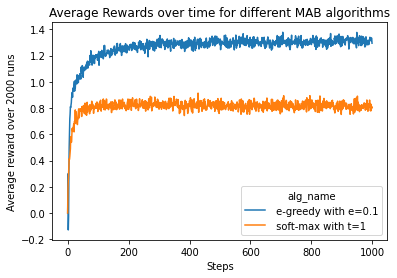

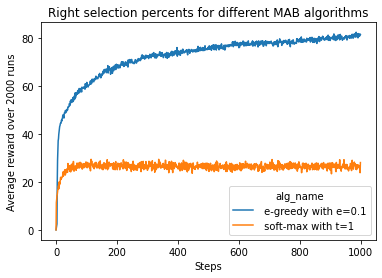

In [ ]:
mab1 = MultiArmBandit(10)
experiment_runner1 = ExperimentRunner()

eps1 = 0.1
eps_greedy1 = Egreedy(eps=eps1, mab=mab1)
experiment_runner1.runExperiments(alg=eps_greedy1,
                                        max_steps=1000, num_runs=2000, alg_name=f' e-greedy with e={eps1}')

temperature1 = 1
soft_max1 = SoftMax(temperature=temperature1, mab=mab1)
experiment_runner1.runExperiments(alg=soft_max1,
                                        max_steps=1000, num_runs=2000, alg_name=f' soft-max with t={temperature1}')

experiment_runner1.plot_part1()

experiment_runner1.plot_part2()

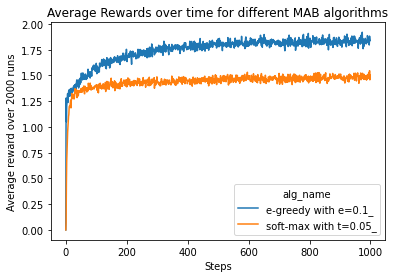

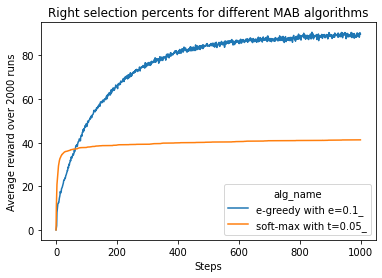

In [ ]:
mab2 = MultiArmBandit(10)
experiment_runner2 = ExperimentRunner()
 
eps2 = 0.1
eps_greedy2 = Egreedy(eps=eps2, mab=mab2)
experiment_runner2.runExperiments(alg=eps_greedy2,
                                        max_steps=1000, num_runs=2000, alg_name=f'e-greedy with e={eps2}')
 
temperature2 = 0.05
soft_max2 = SoftMax(temperature=temperature2, mab=mab2)
experiment_runner2.runExperiments(alg=soft_max2,
                                        max_steps=1000, num_runs=2000, alg_name=f'soft-max with t={temperature2}')
 
experiment_runner2.plot_part1()
 
experiment_runner2.plot_part2()

Soft Max из-за маленькой 'Температуры' жадным и подвисает примерно на одной точности

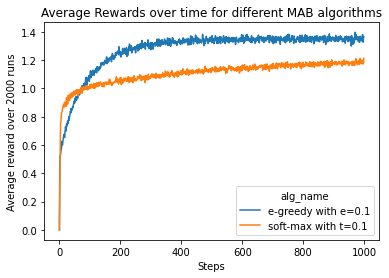

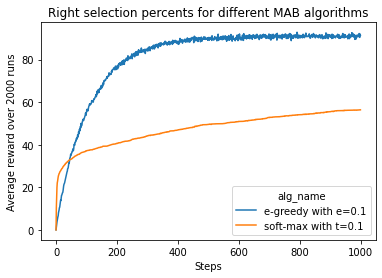

In [ ]:
mab3 = MultiArmBandit(10, 0.5)
experiment_runner3 = ExperimentRunner()

eps3 = 0.1
eps_greedy3 = Egreedy(eps=eps3, mab=mab3)
experiment_runner3.runExperiments(alg=eps_greedy3,
                                        max_steps=1000, num_runs=2000, alg_name=f'e-greedy with e={eps3}')

temperature3 = 0.1
soft_max3 = SoftMax(temperature=temperature3, mab=mab3)
experiment_runner3.runExperiments(alg=soft_max3,
                                        max_steps=1000, num_runs=2000, alg_name=f'soft-max with t={temperature3}')

experiment_runner3.plot_part1()

experiment_runner3.plot_part2()

Уменьшение Дисперсии даёт прирост к правильности выборов для SoftMax

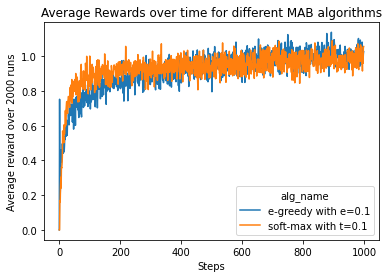

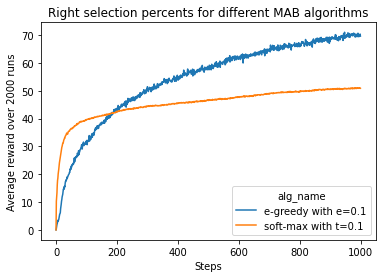

In [ ]:
mab4 = MultiArmBandit(10, 2.)
experiment_runner4 = ExperimentRunner()
 
eps4 = 0.1
eps_greedy4 = Egreedy(eps=eps4, mab=mab4)
experiment_runner4.runExperiments(alg=eps_greedy4,
                                        max_steps=1000, num_runs=2000, alg_name=f'e-greedy with e={eps4}')
 
temperature4 = 0.1
soft_max4 = SoftMax(temperature=temperature4, mab=mab4)
experiment_runner4.runExperiments(alg=soft_max4,
                                        max_steps=1000, num_runs=2000, alg_name=f'soft-max with t={temperature4}')
 
experiment_runner4.plot_part1()
 
experiment_runner4.plot_part2()

Увеличение дисперсии очень сильно влияет на точность e-жадных алгоритмов